In [380]:
import os
import sys
import pylab
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.decomposition import PCA
#from sklearn.decomposition import IncrementalPCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import silhouette_samples, silhouette_score

## Path of the data

In [2]:
data_filepath='/media/ghomsi/SERGUEI/Big_Data/bigdata_aims_senegal/data/UN.csv'
print 'The path to the data set is correct: ', os.path.exists(data_filepath)

The path to the data set is correct:  True


## Reading and cleaning of data

In [3]:
df = pd.read_csv(data_filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 14 columns):
country                   207 non-null object
region                    207 non-null object
tfr                       197 non-null float64
contraception             144 non-null float64
educationMale             76 non-null float64
educationFemale           76 non-null float64
lifeMale                  196 non-null float64
lifeFemale                196 non-null float64
infantMortality           201 non-null float64
GDPperCapita              197 non-null float64
economicActivityMale      165 non-null float64
economicActivityFemale    165 non-null float64
illiteracyMale            160 non-null float64
illiteracyFemale          160 non-null float64
dtypes: float64(12), object(2)

In [4]:
df_clean = df.drop(['contraception','educationMale','educationFemale','economicActivityMale','economicActivityFemale','illiteracyMale','illiteracyFemale'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 7 columns):
country            207 non-null object
region             207 non-null object
tfr                197 non-null float64
lifeMale           196 non-null float64
lifeFemale         196 non-null float64
infantMortality    201 non-null float64
GDPperCapita       197 non-null float64
dtypes: float64(5), object(2)

In [165]:
df_clean_d = df_clean.dropna()
df_clean_d.info()
data = df_clean_d.values


<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 206
Data columns (total 7 columns):
country            188 non-null object
region             188 non-null object
tfr                188 non-null float64
lifeMale           188 non-null float64
lifeFemale         188 non-null float64
infantMortality    188 non-null float64
GDPperCapita       188 non-null float64
dtypes: float64(5), object(2)

## Application of Kmeans on lifeMale and lifeFemale

## Find the best model parameter: the number of clusters

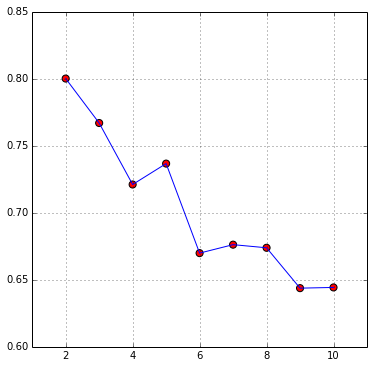

In [140]:
N_clus = range(1,11)
clus = [KMeans(n_clusters=k,n_init=10,init='k-means++',verbose=0) for k in N_clus]
Ckn = [clus[k].fit_predict(data[:,4:7]) for k in range(0,10)] 
dist_d = [clus[k].transform(data[:,4:7]) for k in range(0,10)]
dist_d_new = [np.min(d,axis=1) for d in dist_d] # we take the smallest distance of each chuster versus centroids
mean_dist_d = [sum(d**2)/len(data) for d in dist_d_new] # compute of average of the distance for each cluster
#ss = [clus[k].score(data[:,4:7]) for k in range(0,10)]

scor = [silhouette_score(data[:,4:7], Ckn[k]) for k in range(1,10)]
scor

plt.figure(figsize=(6,6))
plt.plot(range(2,11), scor, 'b-')
plt.scatter(range(2,11), scor, c='r',marker='o',s=50)
plt.grid()


### plot of Average within-cluster sum of squares

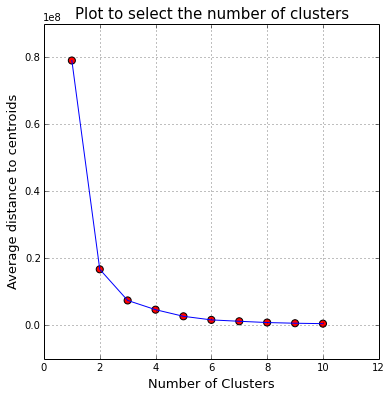

In [141]:
plt.figure(figsize=(6,6))

plt.plot(N_clus, mean_dist_d, 'b-')
plt.scatter(N_clus, mean_dist_d, c='r',marker='o',s=50)
plt.grid()
plt.xlabel('Number of Clusters',fontsize=13)
plt.ylabel('Average distance to centroids',fontsize=13)
plt.title('Plot to select the number of clusters',fontsize=15)
#pl.plot()

### Comments:

### The best number of cluster trought this figure is either 3 or 4, because: from 1 to 2, we have a bigger jump, and also from 2 to 3 the jump is big, but from 3 to 4 the jump starts to become small and decreases successively.

### for our work, we choose 3 clusters

In [28]:
clust=KMeans(n_clusters=3,n_init=10,init='k-means++',verbose=0)#
Ckm=clust.fit_predict(data[:,3:5]) # Compute cluster centers and predict cluster index for each sample.
data_d=clust.transform(data[:,3:5]) # #pour avoir les distances de chaque élément aux centres des clusters

color=('g','b','r')
label = ('First cluster', 'Second cluster','Third cluster')
country0 = data[Ckm==0,0]
country1 = data[Ckm==1,0]
country2 = data[Ckm==2,0]

## Linear regression on lifeMale and lifeFemale

In [7]:
regr1 = linear_model.LinearRegression()
regr1.fit(data[:,3:4],data[:,4:5])
lifeFemale_out1 = regr1.predict(data[:,3:4])


## Plot of Results of KMeans and Linear regression

(31.0, 87.9)

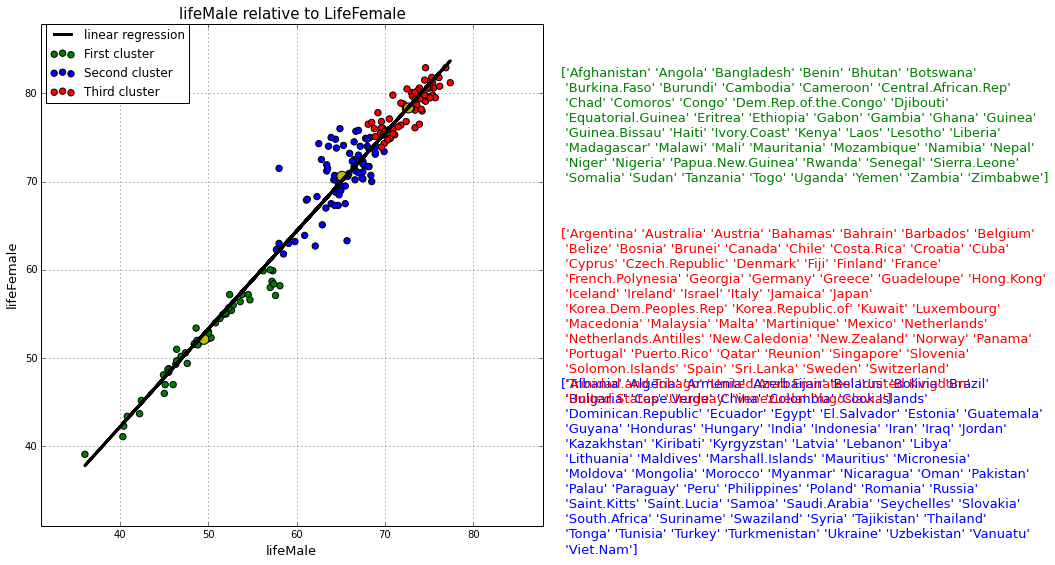

In [8]:
get_ipython().magic(u'matplotlib inline')
plt.figure(figsize=(9,9))
for k in range(3):
    plt.scatter(data[Ckm==k,3],data[Ckm==k,4],c=color[k],s=40,label=label[k])
plt.scatter(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],c='y',marker='o',s=100)
plt.plot(data[:,3],lifeFemale_out1,c='k',linewidth=3,label = 'linear regression')
plt.grid()
plt.xlabel('lifeMale',fontsize=13)
plt.ylabel('lifeFemale',fontsize=13)
plt.title('lifeMale relative to LifeFemale',fontsize=15)
plt.axis('scaled')
plt.legend(bbox_to_anchor=(0.01, 1), loc=2, borderaxespad=0.)
plt.text(90, 70,country0,color=color[0],fontsize=13 )#, ha='center', va='center')#, transform=ax.transAxes)
plt.text(90, 28,country1,color=color[1],fontsize=13 )
plt.text(90, 45,country2,color=color[2],fontsize=13 )
plt.ylim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)
plt.xlim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)

## Prediction using linear regresseion: Ordinary Least Squares

In [9]:
# Split the data into training/testing sets
lifeMale_train = data[:150,3:4]
lifeMale_test = data[150:,3:4] 

# Split the targets into training/testing sets
lifeFemale_train = data[:150,4:5]
lifeFemale_test = data[150:,4:5]

regr2 = linear_model.LinearRegression()# Create linear regression object
regr2.fit( lifeMale_train ,lifeFemale_train ) # Train the model using the training sets



LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [10]:
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(lifeMale_test) - lifeFemale_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % regr2.score(lifeMale_test, lifeFemale_test))

('Coefficients: \n', array([[ 1.1088732]]))
Residual sum of squares: 3.08
Variance score: 0.9773


In [11]:
clust=KMeans(n_clusters=3,n_init=10,init='k-means++',verbose=0)#
Ckm1=clust.fit_predict(np.concatenate((lifeMale_test,lifeFemale_test), axis = 1)) # Compute cluster centers and predict cluster index for each sample.
#data_d=clust.transform(data[:,3:5]) # #pour avoir les distances de chaque élément aux centres des cluster


country = data[150:,0]

count0 =  country[Ckm1==0]
count1 =  country[Ckm1==1] 
count2 = country[Ckm1==2]

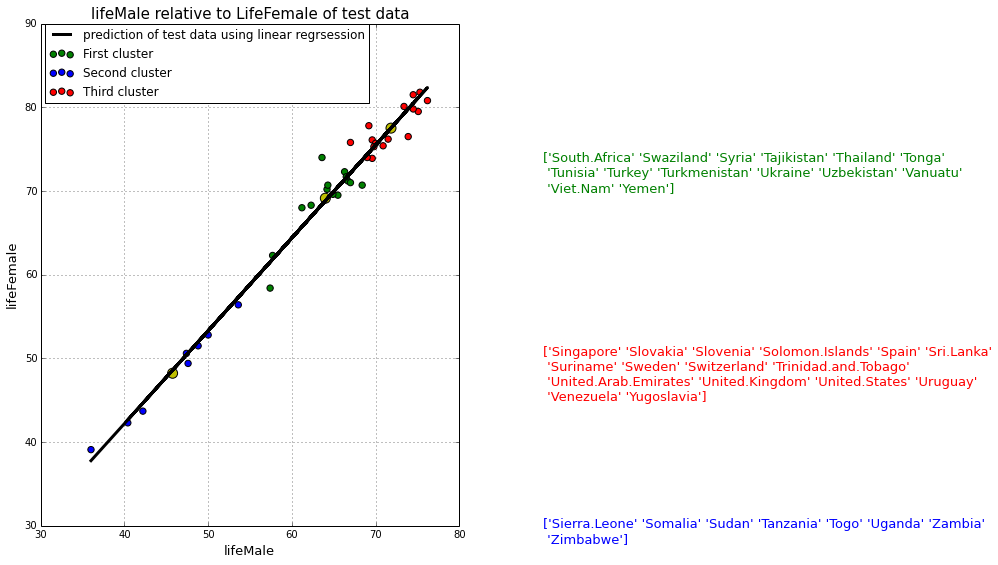

In [12]:
plt.figure(figsize=(9,9))
for k in range(3):
    plt.scatter(lifeMale_test[Ckm1==k],lifeFemale_test[Ckm1==k],c=color[k],s=40,label=label[k])
plt.scatter(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],c='y',marker='o',s=100)
plt.plot(lifeMale_test,regr2.predict(lifeMale_test),c='k',linewidth=3,label = 'prediction of test data using linear regrsession')
plt.grid()
plt.xlabel('lifeMale',fontsize=13)
plt.ylabel('lifeFemale',fontsize=13)
plt.title('lifeMale relative to LifeFemale of test data',fontsize=15)
plt.axis('scaled')
plt.legend(bbox_to_anchor=(0.01, 1), loc=2, borderaxespad=0.)
plt.text(90, 70,count0,color=color[0],fontsize=13 )#, ha='center', va='center')#, transform=ax.transAxes)
plt.text(90, 28,count1,color=color[1],fontsize=13 )
plt.text(90, 45,count2,color=color[2],fontsize=13 )
#plt.ylim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)
#plt.xlim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)
#plt.annotate('first bissector', xy=(60, 60), xytext=(70, 40),fontsize=15,
            #arrowprops=dict(facecolor='black', shrink=0.05))

## Ridge regression

In [13]:
lifeMale_train = data[:150,3]
lifeMale_test = data[150:,3]

#>>> x = np.array([1, 2, 3, 5])
#>>> N = 3
#>>> np.vander(x, N)
#np.column_stack([x**(N-1-i) for i in range(N)])

('degree 2alpha0', 3.0415398453351314)
('degree 5alpha0', 4.340590759043175)
('degree 2alpha1e-06', 3.0415398383848555)
('degree 5alpha1e-06', 4.329456439255927)
('degree 2alpha0.001', 3.0415328957494427)
('degree 5alpha0.001', 2.835269265289708)


(31.0, 87.9)

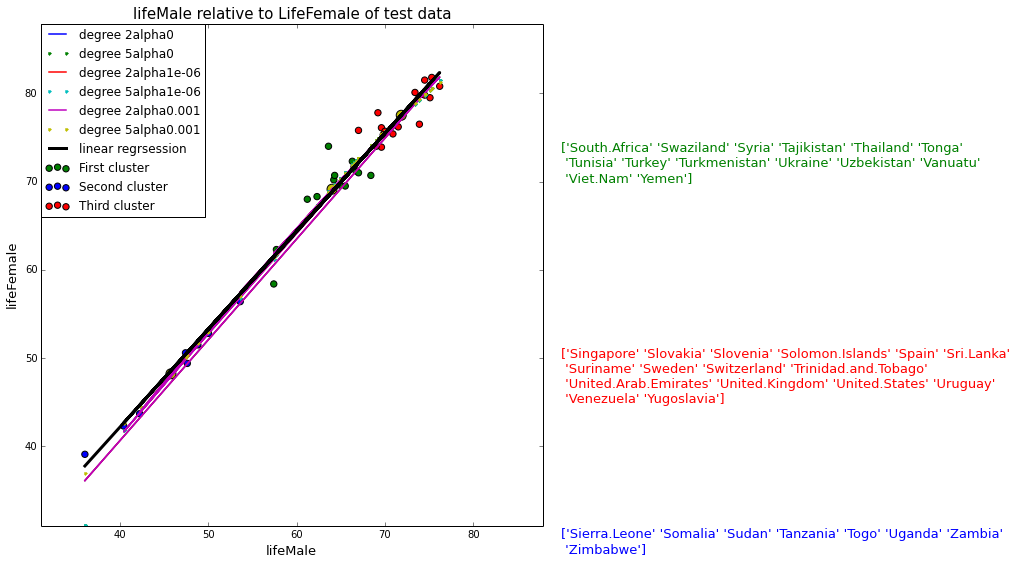

In [14]:
plt.figure(figsize=(9,9))
alphas = [0,1e-6,1e-3]

for p in alphas:
    regr4 = linear_model.Ridge(alpha = p )
    for deg, s in zip([2, 5], ['-', '.']):
        regr4.fit(np.vander(lifeMale_train, deg + 1), lifeFemale_train)
        lifeFemale_rp=regr4.predict(np.vander(lifeMale_test,deg +1 )) 
        plt.plot(lifeMale_test, lifeFemale_rp, s,linewidth=1.5, label='degree ' + str(deg)+'alpha'+str(p))
        print('degree ' + str(deg)+'alpha'+str(p) , np.mean((lifeFemale_rp - lifeFemale_test) ** 2))
plt.scatter(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],c='y',marker='o',s=100)
plt.plot(lifeMale_test,regr2.predict(data[150:,3:4]),c='k',linewidth=3,label = 'linear regrsession')


for k in range(3):
    plt.scatter(lifeMale_test[Ckm1==k],lifeFemale_test[Ckm1==k],c=color[k],s=40,label=label[k])
plt.xlabel('lifeMale',fontsize=13)
plt.ylabel('lifeFemale',fontsize=13)
plt.title('lifeMale relative to LifeFemale of test data',fontsize=15)
plt.axis('scaled')
plt.legend(bbox_to_anchor=(0.0, 1), loc=2, borderaxespad=0.)
plt.text(90, 70,count0,color=color[0],fontsize=13 )#, ha='center', va='center')#, transform=ax.transAxes)
plt.text(90, 28,count1,color=color[1],fontsize=13 )
plt.text(90, 45,count2,color=color[2],fontsize=13 )
plt.ylim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)
plt.xlim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)

## Cross validation Ridge Regression Linear 

('degree 2', 3.04147039675859, 0.97760648203053724)
('degree 5', 2.835269265289708, 0.97912468478792491)


(31.0, 87.9)

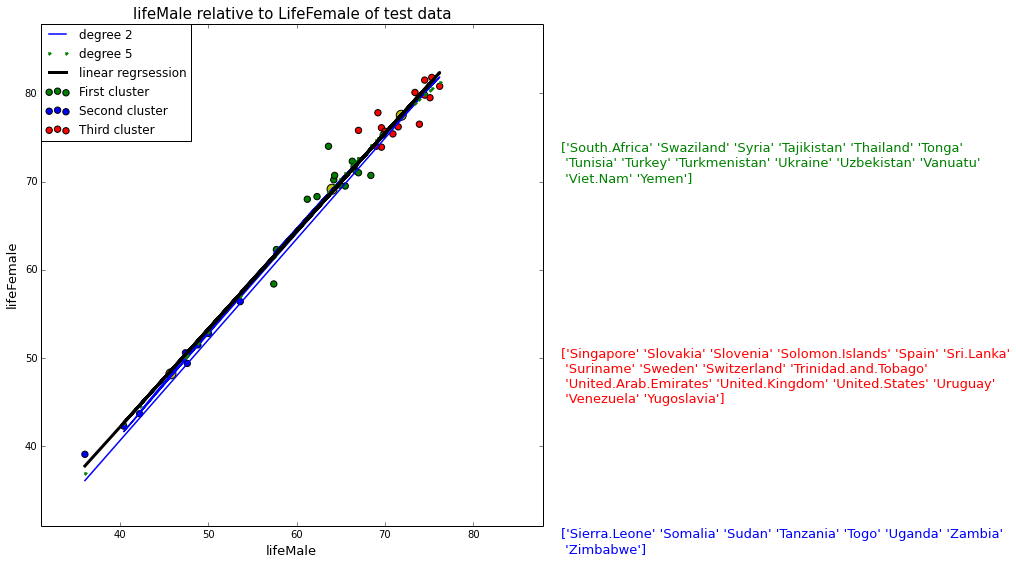

In [15]:
plt.figure(figsize=(9,9))
#alphas = [0,1e-6,1e-3]


regr4 = linear_model.RidgeCV(alphas = [1e-20,1e-15,1e-10,1e-6,1e-3,1e-2], cv = 10, scoring = 'accuracy')
for deg, s in zip([2, 5], ['-', '.']):
    regr4.fit(np.vander(lifeMale_train, deg + 1), lifeFemale_train)
    lifeFemale_rp=regr4.predict(np.vander(lifeMale_test,deg +1 )) 
    plt.plot(lifeMale_test, lifeFemale_rp, s,linewidth=1.5, label='degree ' + str(deg))
    print('degree ' + str(deg) , np.mean((lifeFemale_rp - lifeFemale_test) ** 2), regr4.score(np.vander(lifeMale_test,deg +1 ), lifeFemale_test))
plt.scatter(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],c='y',marker='o',s=100)
plt.plot(lifeMale_test,regr2.predict(data[150:,3:4]),c='k',linewidth=3,label = 'linear regrsession')


for k in range(3):
    plt.scatter(lifeMale_test[Ckm1==k],lifeFemale_test[Ckm1==k],c=color[k],s=40,label=label[k])
plt.xlabel('lifeMale',fontsize=13)
plt.ylabel('lifeFemale',fontsize=13)
plt.title('lifeMale relative to LifeFemale of test data',fontsize=15)
plt.axis('scaled')
plt.legend(bbox_to_anchor=(0.0, 1), loc=2, borderaxespad=0.)
plt.text(90, 70,count0,color=color[0],fontsize=13 )#, ha='center', va='center')#, transform=ax.transAxes)
plt.text(90, 28,count1,color=color[1],fontsize=13 )
plt.text(90, 45,count2,color=color[2],fontsize=13 )
plt.ylim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)
plt.xlim(np.min(data[:,3:5])-5,np.max(data[:,3:5])+5)

In [168]:
clust_2=KMeans(n_clusters=3,n_init=10,init='k-means++',verbose=0)#
Ckm_2=clust_2.fit_predict(data[:,4:7]) # Compute cluster centers and predict cluster index for each sample.
data_d_2=clust_2.transform(data[:,4:7])
country0_1 = data[Ckm_2==0,0]
country1_1 = data[Ckm_2==1,0]
country2_1 = data[Ckm_2==2,0]
color=('g','b','r')

(30, 90)

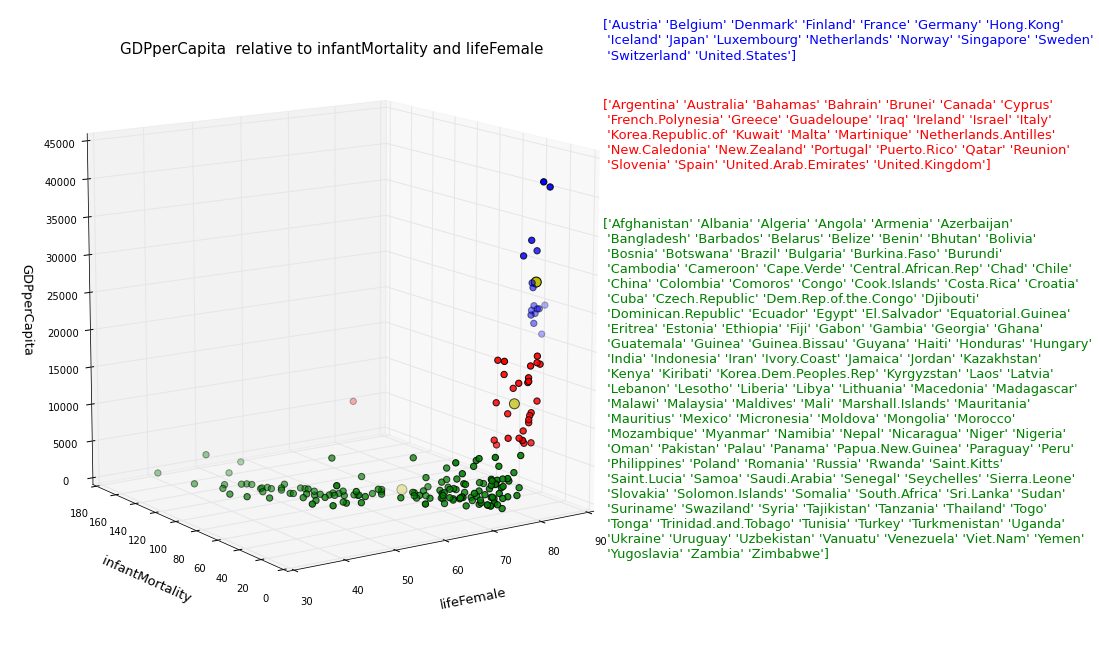

In [169]:
fig =plt.figure(figsize=(9,9))

ax = Axes3D(fig)
for k in range(3):
    ax.scatter(data[Ckm_2==k,4],data[Ckm_2==k,5],data[Ckm_2==k,6],c=color[k],s=40,label=label[k])
ax.scatter(clust_2.cluster_centers_[:,0],clust_2.cluster_centers_[:,1],clust_2.cluster_centers_[:,2],c='y',marker='o',s=100)
plt.grid()
ax.set_xlabel('lifeFemale',fontsize=13)
ax.set_ylabel('infantMortality ',fontsize=13)
ax.set_zlabel('GDPperCapita',fontsize=13)
ax.set_title('GDPperCapita  relative to infantMortality and lifeFemale',fontsize=15)
ax.set_zlim(0,45000)
ax.set_ylim(0,180)
ax.set_xlim(30,90)
ax.text2D(0.92,0.15,country0_1,color=color[0],fontsize=13,transform=ax.transAxes )#, ha='center', va='center')#, transform=ax.transAxes)
ax.text2D(0.92,0.92,country1_1,color=color[1],fontsize=13,transform=ax.transAxes )
ax.text2D(0.92,0.75, country2_1,color=color[2],fontsize=13,transform=ax.transAxes )
ax.view_init(elev=13, azim=-124)
ax.set_zlim(0,45000)
ax.set_ylim(0,180)
ax.set_xlim(30,90)

In [ ]:
## Organization of index
app = []
for i in [0,1,2]:
    ap = np.mean(data[Ckm_2==i,6])
    app.append(ap)
print app
aamax = np.where(app==np.max(app))
aamin = np.where(app==np.min(app))
aamean = np.where((app!=np.max(app)) & (app!=np.min(app)))

# creation of new column of index from KMeans Clustering
df_clean_d['countrySeg'] = Ckm_2

# set of clustering index, and color of each cluster
clust_map = {sum(aamin[0]):'Under Developed',sum(aamean[0]):'Emergent',sum(aamax[0]):'Developed'}
d_color = {'Under Developed':'r','Emergent':'b','Developed':'g'}

# new column of three clusters categories of country
df_clean_d.countrySeg = df_clean_d.countrySeg.map(clust_map)


## PCA on GDPperCapita, lifeFemale, lifeMale  and infantMortality

In [374]:
pca = PCA(n_components='mle')
pca.fit(data[:,3:7])
data_pca = pca.fit_transform(data[:,3:7])
cooeff_var = pca.explained_variance_ratio_
print "the ratio of explained variance are:", cooeff_var

lda = linear_model.LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

#ipca = IncrementalPCA(n_components='mle', batch_size=10)
#data_ipca = ipca.fit_transform(data[:,3:7])
#cooeff_var_1 = ipca.explained_variance_ratio_

the ratio of explained variance are: [  9.99984156e-01   1.55780933e-05   2.42589487e-07]


AttributeError: 'module' object has no attribute 'LinearDiscriminantAnalysis'

### Plot of results of PCA

In [310]:
clust_map.values()[1]

'Developed'

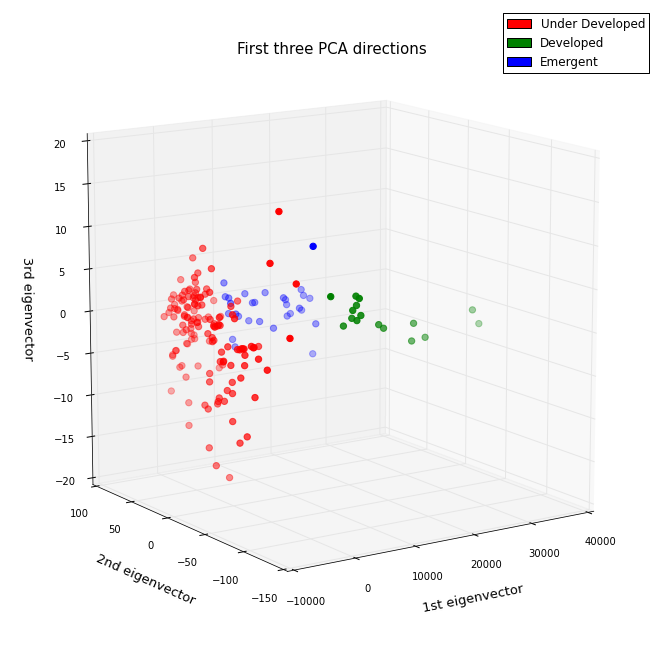

In [364]:


fig =plt.figure(figsize=(9,9))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig, elev=13, azim=-124)
proxy =[]
for j in clust_map.values():
    colors = d_color[j]
    ax.scatter(data_pca[np.where(df_clean_d.countrySeg==j), 0], data_pca[np.where(df_clean_d.countrySeg==j), 1]
               , data_pca[np.where(df_clean_d.countrySeg==j), 2],label = j, color = colors, s = 40)
    proxyy = plt.Rectangle((0, 0), 1, 1, fc=colors)
    proxy.append(proxyy)

ax.legend(proxy,clust_map.values())
ax.set_xlabel("1st eigenvector",fontsize=13)
ax.set_ylabel('2nd eigenvector ',fontsize=13)
ax.set_zlabel('3rd eigenvector',fontsize=13)
ax.set_title("First three PCA directions",fontsize=15)


In [205]:
d_color[2]

KeyError: 2

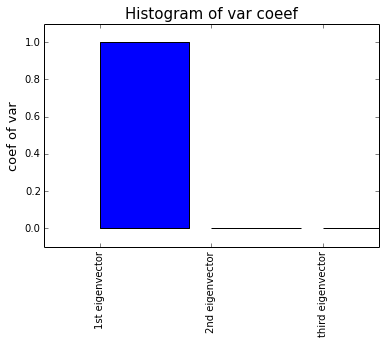

In [363]:
fig1, ax1 = plt.subplots()
plt.bar(range(len(cooeff_var)), cooeff_var)

ax1.set_xticks(range(len(cooeff_var)))
ax1.set_xticklabels(['1st eigenvector','2nd eigenvector','third eigenvector'],rotation='vertical')
ax1.set_ylim(-0.1,1.1)
ax1.set_xlim(-0.5,2.5)
ax1.set_ylabel('coef of var',fontsize=13)
ax1.set_title("Histogram of var coeef",fontsize=15)

### Comments:

#### When we look the histogram of coef of explained variance and the 3D plot of eigen vector issued of PCA, we can note that the the first eigen vector contains the majority of information compared to the other eigen vectors. With an explained variance coef of 0.99, the first eigen vector can be use only to do our analysis. This eigen vector corresponds to the GDP. 
#### So the PCA allows us to reduce the dimensions of feaature in this analysis, the GDP data represent well the variablility of all data.